In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Regresión lineal

Un modelo lineal hace una predicción simplemente calculando una **suma ponderada de las variables de entrada, más una constante llamada término de sesgo** (también llamada intersección), y se puede expresar con la siguiente ecuación: 

$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$

donde: 
* $\hat{y}$ es el valor predecido
* $n$ es el número de variables
* $x_{i}$ es el valor en la variable ${i}$ésima
* $\theta_{j}$ es el $j$ésimo coeficiente del modelo (incluyendo el término de sesgo $\theta_{0}$ y los coeficientes $\theta_{1},\theta_{2}...\theta{n}$)  


Esto se puede escribir de manera mucho más concisa usando una forma vectorizada, que se puede expresar con la siguiente ecuación:

$\hat{y}=h_{\theta}(x)=\theta*x$

donde:
* $\theta$ es el vector de coeficientes del modelo (incluyendo el término de sesgo $\theta_{0}$ y los coeficientes $\theta_{1},\theta_{2}...\theta{n}$)
* $x$ es el vector de valores (incluyendo $x_{0}$ a $x_{n}$, en donde $x_{0}$ es siempre igual a 1) 
* $\theta*x$ es el producto punto de los vectores $\theta$ y $x$ (igual a $\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$)
* $h_{\theta}$ es la función hipotética del modelo que utiliza los coeficientes $\theta$

En Machine Learning, los vectores a menudo se representan como vectores de columna, que son matrices 2D con una sola columna. Si $\theta$ y $x$ son vectores columna, entonces la predicción es: $\hat{y}=\theta^{T}x$, donde $\theta^{T}$ es el la transposición de $\theta$ (un vector fila en lugar de un vector columna) y $\theta^{T}x$ es la multiplicación matricial de $\theta^{T}$ y $x$. Por supuesto, es la misma predicción, excepto que ahora se representa como una matriz de una sola celda en lugar de un valor escalar.

**Entrenar un modelo significa determinar sus coeficientes para que el modelo se ajuste mejor al conjunto de datos de entrenamiento.** Para este propósito, primero necesitamos una medida de qué tan bien (o mal) se ajusta el modelo a los datos de entrenamiento, es decir, una función de costo. **La medida de rendimiento más común de un modelo de regresión es el error cuadrático medio (ECM).** Por lo tanto, para entrenar un modelo de regresión lineal, debemos encontrar los valores de θ que minimizan el ECM, que se puede expresar con la siguiente ecuación:

$MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})^2$

Para encontrar el valor de $\theta$ que minimiza la función de costo, existe una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente. Esto se llama la **ecuación normal**, que se puede expresar con la siguiente ecuación:

$\hat\theta=(X^TX)^{-1}X^Ty$

donde:
* $\hat\theta$ es el vector de coeficientes del modelo que minimizan la función de costo)
* $y$ es el vector de los valores de la variable dependiente (incluyendo $y^{(1)}$ a $y^{(m)}$)


In [18]:
# Define variables independientes
X = 2 * np.random.rand(100, 1)

# Define variables dependientes (y = 4 + 3x_1 + ruído gauseano)
y = 4 + 3 * X + np.random.randn(100, 1)

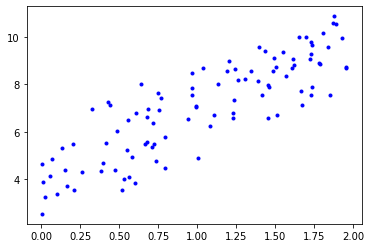

In [19]:
# Grafica X y y
plt.plot(X, y, "b.")

In [20]:
# Agregamos x_0 = 1 a cada observación
X_b = np.c_[np.ones((100, 1)), X]

# Ecuación normal
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.96135725],
       [2.97474623]])

Habríamos esperado que $\theta_0=4$ y $\theta_1=3$. No obstante, los coeficientes ajustados son los suficientemente cerca, pero el ruído gauseano hace imposible recuperar los coeficientes exactos de la función original.

Ahora, es posible hacer predicciones utilizando $\hat\theta$.

In [29]:
# Predice valores de variable dependiente
y_predict = X_b.dot(theta_best)

In [32]:
# Devuelve MSE
mean_squared_error(y, y_predict)

1.0789441394842298

En estadística, el coeficiente de determinación, denominado $R^2$, determina la calidad de un modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo, y se puede expresar con la siguiente ecuacuón:


$R^2=\frac{\sigma^2_{xy}}{\sigma^2_{x}\sigma^2_{y}}$

en donde: 
* $\sigma_{xy}$ es la covarianza de $(X,Y)$
* $\sigma^2_{x}$ es la varianza de la variable $X$
* $\sigma^2_{y}$ es la varianza de la variable $Y$

In [31]:
# Devuelve R2 
r2_score(y, y_predict)

0.734696303000173

También, es posible hacer predicciones de nuevos datos utilizando $\hat\theta$.

In [28]:
# Define nuevas observaciones para variables independientes
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Predice valores de variable dependiente
y_new_predict = X_new_b.dot(theta_best)
y_new_predict

array([[3.96135725],
       [9.91084972]])

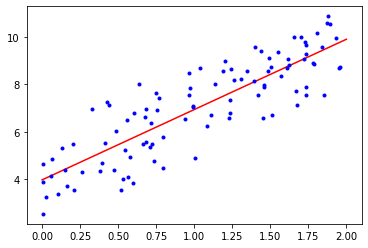

In [22]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

Scikit-Learn proporciona una clase útil para implementar y entrenar un modelo de regresión lineal: `LinearRegression`.

In [23]:
# Crea objeto de regresión lineal
lin_reg = LinearRegression()

In [24]:
# Ajusta modelo de regresión lineal
lin_reg.fit(X, y)

# Devuelve intercepto y coeficientes de modelo de regresión linea
lin_reg.intercept_, lin_reg.coef_

(array([3.96135725]), array([[2.97474623]]))

## Regresión polinomial

¿Cómo ajustamos un modelo a datos que son en realidad más complejos que una simple línea recta Sorprendentemente, podemos usar un modelo lineal para ajustar datos no lineales. Una forma sencilla de hacer esto es agregar potencias de cada variable como variables nuevas y luego entrenar un modelo lineal en este conjunto ampliado de variables. Esta técnica se llama regresión polinomial.

In [39]:
# Define variables independientes
m = 100
X = 6 * np.random.rand(m, 1) - 3

# Define variables dependientes (y = 0.5 * x_1^2 + x_i + 2 + ruído gauseano)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

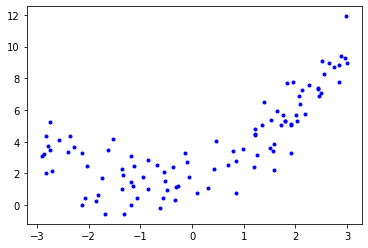

In [40]:
# Grafica X y y
plt.plot(X, y, "b.")

Para transformar nuestros datos de entrenamiento, agregando el cuadrado (polinomio de segundo grado) de cada variable, podemos utilizar la clase `PolynomialFeatures`. 

In [44]:
# Crea objeto para transformar
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transforma conjunto de datos con el objeto para transformar
X_poly = poly_features.fit_transform(X)

# Imprime comparativa entre dato original y dato tranformado
print(X[0])
print(X_poly[0])

[0.69825441]
[0.69825441 0.48755922]


`X_poly` ahora contiene la variable original de $X$ y el cuadrado de esta misma. Ahora, es posible ajustar un modelo de regresión lineal a estos datos de entrenamiento extendidos. 

In [46]:
# Crea objeto de regresión lineal
lin_reg = LinearRegression()

In [47]:
# Ajusta modelo de regresión lineal
lin_reg.fit(X_poly, y)

# Devuelve intercepto y coeficientes de modelo de regresión linea
lin_reg.intercept_, lin_reg.coef_

(array([1.76514217]), array([[0.97240844, 0.57096814]]))

Debemos tener en cuenta que cuando hay múltiples variables, la regresión polinomial es capaz de encontrar relaciones entre todas ellas (que es algo que un modelo de regresión lineal simple no puede hacer). Esto es posible gracias al hecho de que `PolynomialFeatures` también agrega todas las combinaciones de variables hasta el grado dado. Por ejemplo, si hubiera dos variables $a$ y $b$, `PolynomialFeatures` con tre grados no solo agregaría $a^2$, $b^2$, $a^3$ y $b^3$, pero también las combinaciones $ab$, $a^2b$ y $ab^2$. 